In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/junyuwu/CA House Analysis /components/housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

In [5]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
total_bedrooms_avg = df["total_bedrooms"].mean()
df["total_bedrooms"].fillna(round(total_bedrooms_avg,1), inplace=True)

In [7]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
ave_rooms = df["total_rooms"]/df["households"]
df["ave_rooms"] = ave_rooms

In [9]:
ave_bedrooms = df['total_bedrooms']/df['households']
ave_people = df['population']/df['households']

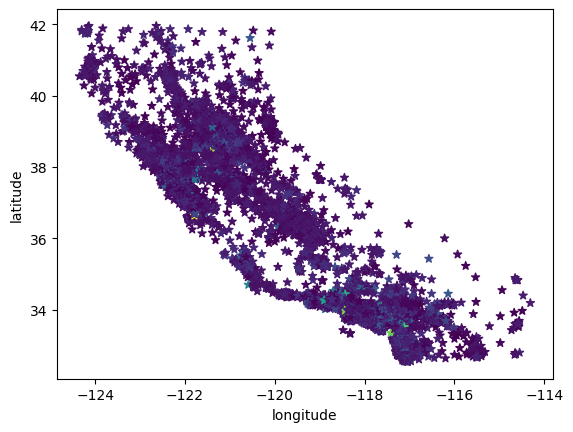

In [10]:
x = df['longitude']
y = df['latitude']

plt.scatter(x, y, c=df['households'], marker="*")
plt.ylabel("latitude")
plt.xlabel("longitude");

/var/folders/tr/00d44tjd3wz1f_ccm0ktlwp80000gn/T/ipykernel_6646/656484475.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


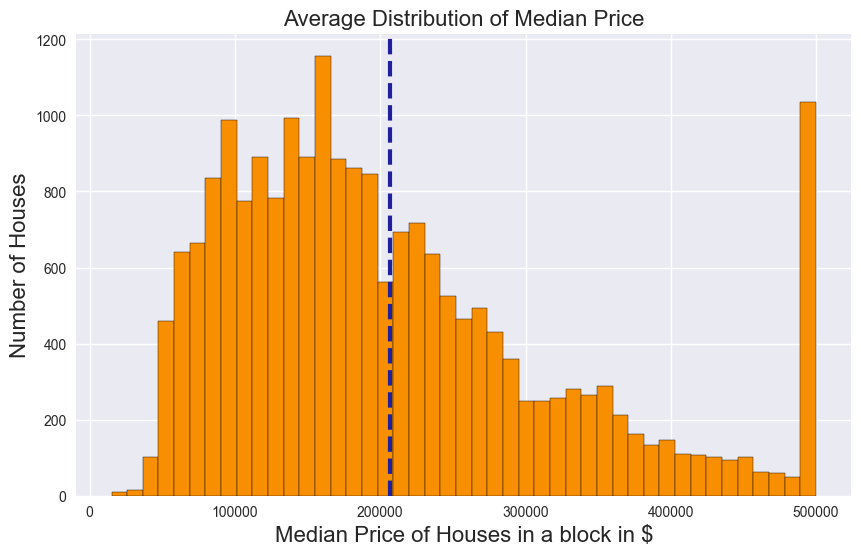

In [11]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn')
data = df["median_house_value"]
plt.hist(data, bins = 45, ec = 'black', color = '#f88f01')
plt.xlabel('Median Price of Houses in a block in $', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Median Price', fontsize=16)
plt.axvline(df['median_house_value'].mean(), color='#21209c', linestyle='dashed', linewidth=3, label='Average Price of House in a block');

In [12]:
to_drop = df[df["median_house_value"]>500000].index
df.drop(to_drop,inplace=True)

/var/folders/tr/00d44tjd3wz1f_ccm0ktlwp80000gn/T/ipykernel_6646/656484475.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


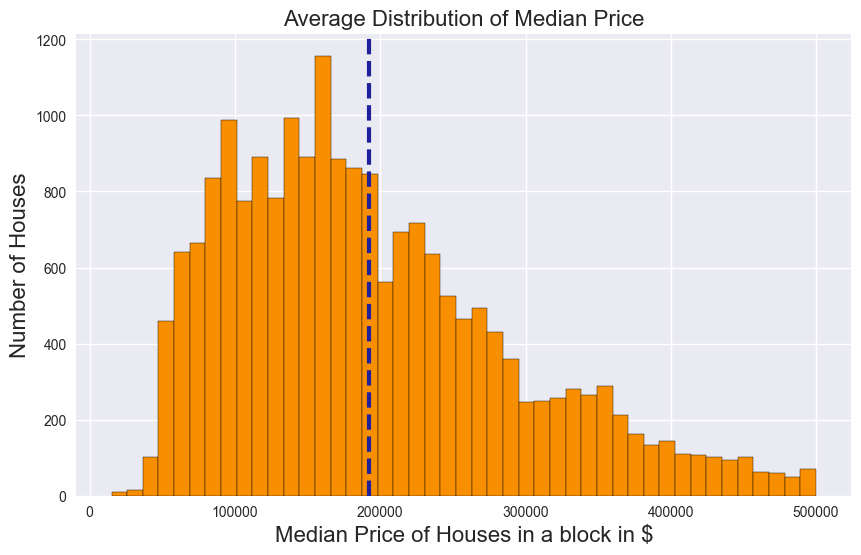

In [13]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn')
data = df["median_house_value"]
plt.hist(data, bins = 45, ec = 'black', color = '#f88f01')
plt.xlabel('Median Price of Houses in a block in $', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Median Price', fontsize=16)
plt.axvline(df['median_house_value'].mean(), color='#21209c', linestyle='dashed', linewidth=3, label='Average Price of House in a block');

Text(0.5, 1.0, 'Median Price vs Average Number of Rooms')

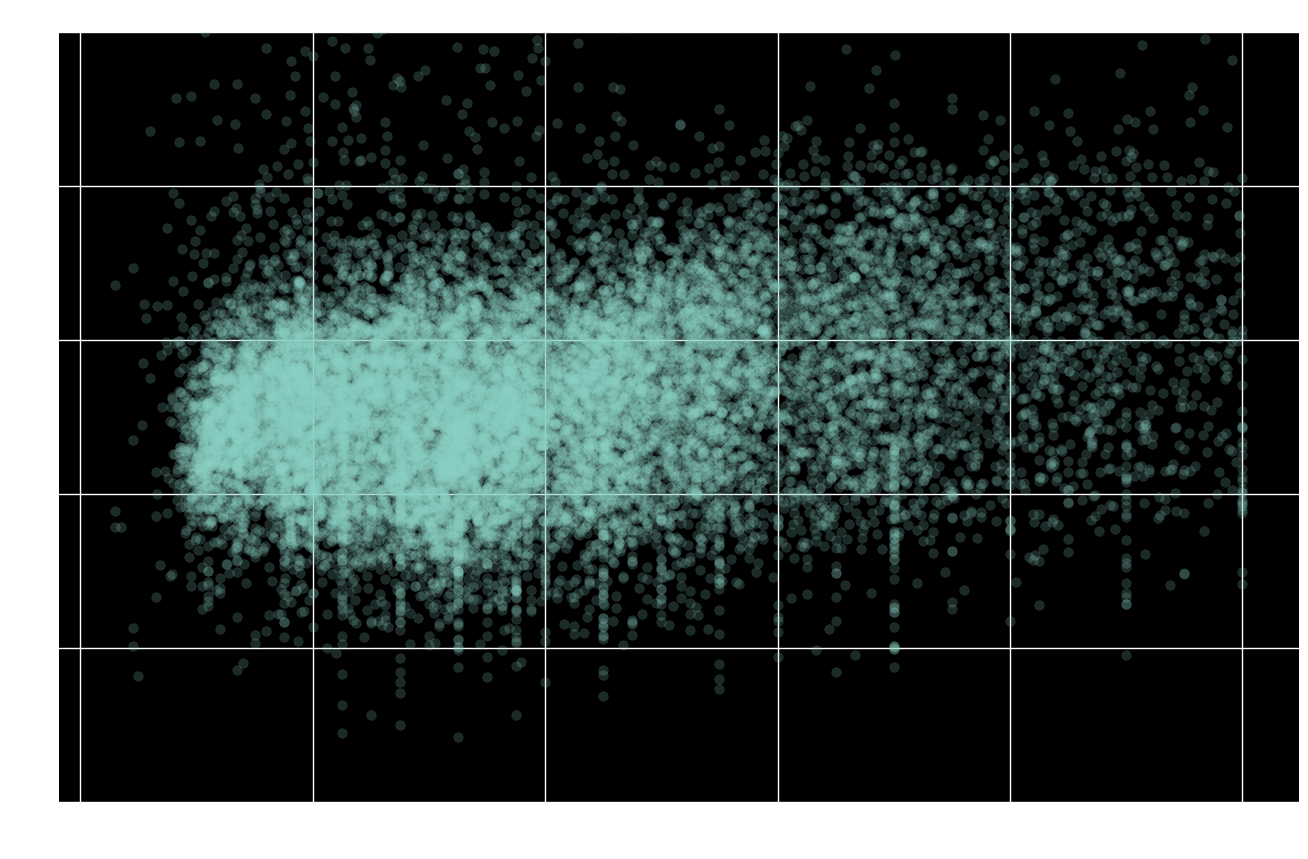

In [14]:
plt.figure(figsize=(16, 10))
plt.style.use('dark_background')
x = df['median_house_value']
y = df['ave_rooms']
plt.scatter(x, y, alpha=0.2)
plt.ylim(0, 10)

plt.xlabel('Median Price of the House', fontsize = 14)
plt.ylabel('Average Number of Rooms per household', fontsize = 14)
plt.title('Median Price vs Average Number of Rooms', fontsize = 14)

/var/folders/tr/00d44tjd3wz1f_ccm0ktlwp80000gn/T/ipykernel_6646/1694684921.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn");


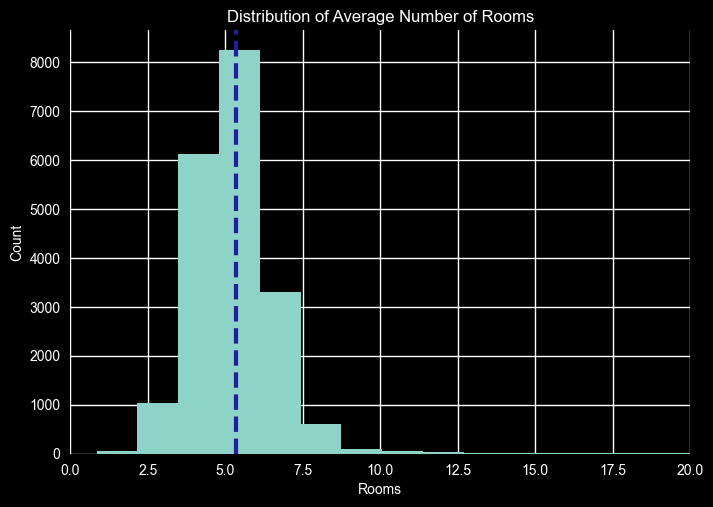

In [15]:
values = df["total_rooms"] / df["households"]

plt.hist(values, bins=100)
plt.xlim(0,20)
plt.axvline(values.mean(), color='#21209c', linestyle='dashed', linewidth=3, label="Median")

plt.xlabel("Rooms")
plt.ylabel("Count")

plt.title("Distribution of Average Number of Rooms")

plt.style.use("seaborn");

/var/folders/tr/00d44tjd3wz1f_ccm0ktlwp80000gn/T/ipykernel_6646/3985971350.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr())
/var/folders/tr/00d44tjd3wz1f_ccm0ktlwp80000gn/T/ipykernel_6646/3985971350.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, mask = mask,annot_kws={"size":14})


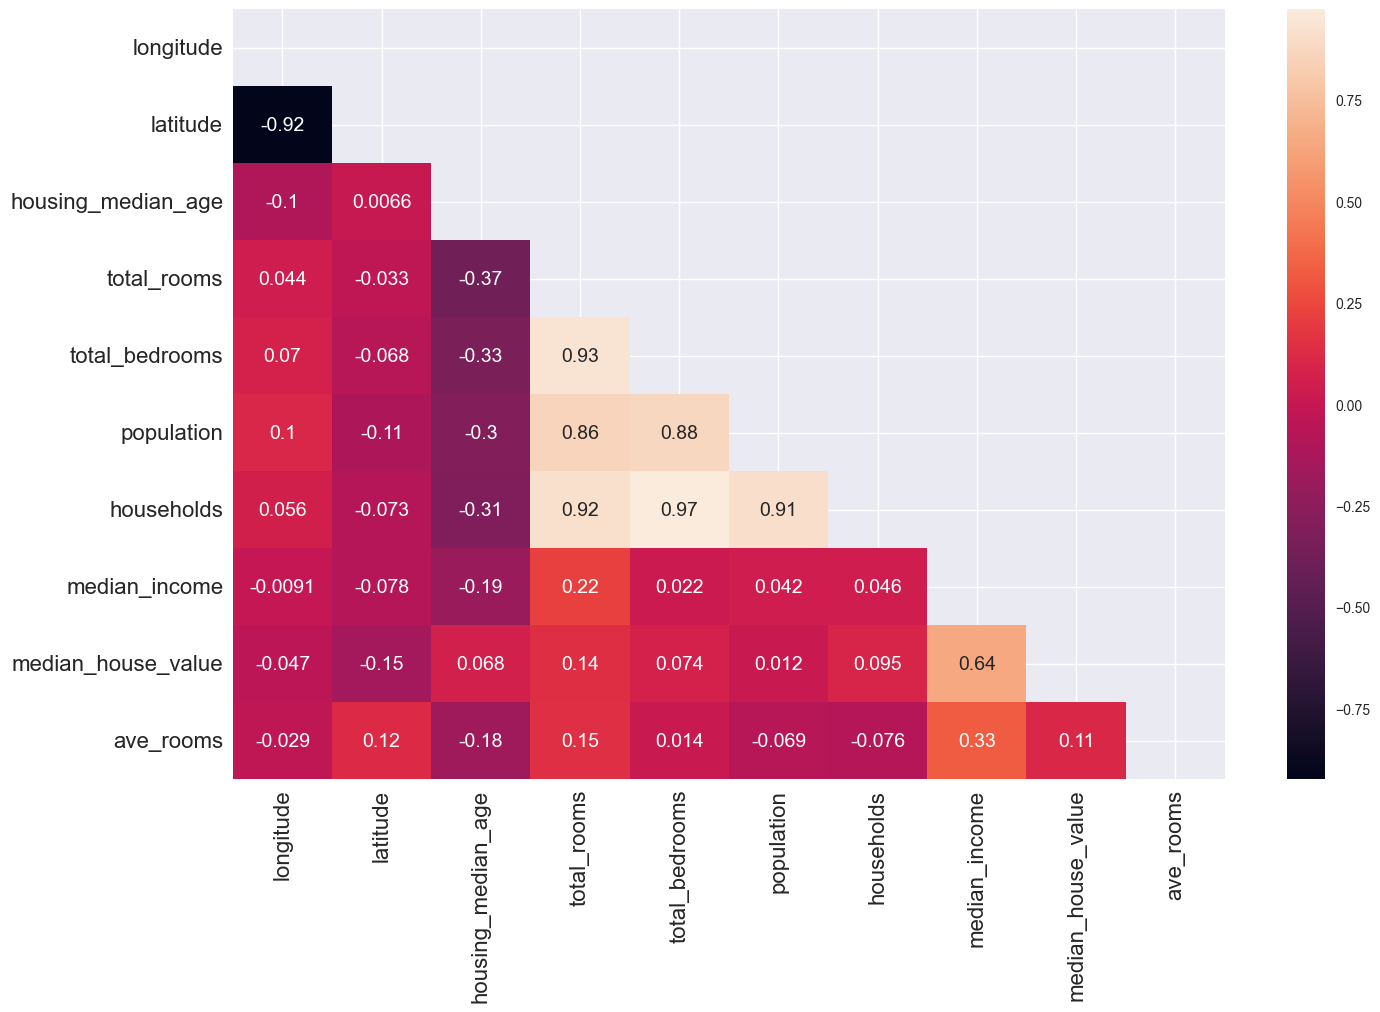

In [16]:
mask = np.zeros_like(df.corr())
triangle_indicies = np.triu_indices_from(mask)
mask[triangle_indicies] = True
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True, mask = mask,annot_kws={"size":14})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

In [17]:
pd.get_dummies(df["ocean_proximity"])

dummies = pd.get_dummies(df["ocean_proximity"])

data = pd.concat([df,dummies],axis=1)

data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ave_rooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0,1,0,0,0


In [18]:
X = data[["population","total_bedrooms","INLAND","NEAR BAY","NEAR OCEAN"]]
y = data["median_house_value"]

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.2745105230649024

In [21]:
X = df[["median_income"]]
y = df["median_house_value"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.4028016798696281

In [24]:
X = df[["housing_median_age"]]
y = df["median_house_value"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.0040070749428794405

In [25]:
X = df[["total_rooms","total_bedrooms"]]
y = df["median_house_value"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.05033143930405637

In [27]:
X = df[["ave_rooms"]]
y = df["median_house_value"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.0005774521720769421

In [28]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ave_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513


In [40]:
byocean = df.groupby("ocean_proximity")[["median_house_value"]].mean()
byocean.reset_index(inplace=True)
byocean

,ocean_proximity,median_house_value
0,<1H OCEAN,224013.191539
1,INLAND,123252.620478
2,ISLAND,380440.000000
3,NEAR BAY,236925.572519
4,NEAR OCEAN,227716.802944


/var/folders/tr/00d44tjd3wz1f_ccm0ktlwp80000gn/T/ipykernel_6646/3520830770.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


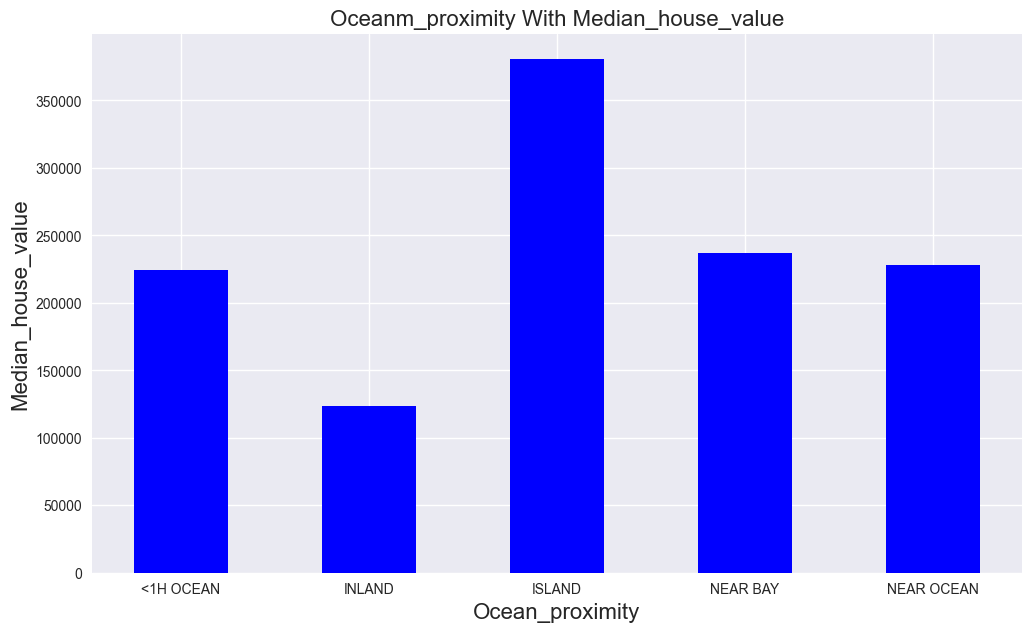

In [43]:
x_axis = byocean.ocean_proximity
y_axis = byocean.median_house_value
plt.figure(figsize=(12, 7))
plt.style.use('seaborn')
plt.bar(x_axis, y_axis, width=0.5, color="blue")
plt.title('Oceanm_proximity With Median_house_value',fontsize=16)
plt.xlabel('Ocean_proximity',fontsize=16)
plt.ylabel('Median_house_value',fontsize=16);

In [34]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ave_rooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0,1,0,0,0


In [35]:
X = data[["<1H OCEAN","INLAND","ISLAND","NEAR BAY","NEAR OCEAN"]]
y = data["median_house_value"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.24597838882012812